In [1]:
!pip install pingouin
!pip install --upgrade category_encoders
import pingouin as pg
from decimal import Decimal, getcontext
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson, expon, geom,norm
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import powerlaw
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway
from scipy.stats import kruskal
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats import skew, kurtosis
from scipy.stats import kstest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.9 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("/content/investments_VC.csv", encoding='ISO-8859-1')
df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Strip whitespace from all column names
df.columns = df.columns.str.strip()

# Rename the column
df.rename(columns={'funding_total_usd': 'amount_USD'}, inplace=True)
df.rename(columns={'founded_month': 'month'}, inplace=True)
df.rename(columns={'founded_year': 'year'}, inplace=True)

**Performing EDA on the categorical columns of the dataset - and the numerical columns of the dataset.**

**Evaluating -Datatypes, Missing Data, and Summary Statistics.**


In [4]:
df = df.dropna()
df

,permalink,name,homepage_url,category_list,market,amount_USD,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,"17,50,000",operating,USA,NJ,Newark,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49426,/organization/zynga,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,"86,65,50,786",operating,USA,CA,SF Bay Area,...,0.0,0.0,15026000.0,355187000.0,490000000.0,0.0,0.0,0.0,0.0,0.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49429,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,"3,42,75,015",operating,USA,MO,MO - Other,...,0.0,0.0,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Reviewing few samples
df.sample(15)

,permalink,name,homepage_url,category_list,market,amount_USD,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
15759,/organization/foko,FoKo,http://www.foko.co,|Enterprise Software|,Enterprise Software,"4,50,000",operating,CAN,QC,Gatineau,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25784,/organization/mdxhealth,MDxHealth,http://mdxhealth.com,|Biotechnology|,Biotechnology,"2,36,00,000",operating,USA,CA,Anaheim,...,0.0,0.0,23600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,/organization/adtonik,AdTonik,http://adtonik.com/,|Television|Mobile Analytics|Analytics|Mobile ...,Mobile Advertising,"5,00,000",operating,USA,CA,SF Bay Area,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32006,/organization/pet-airways,Pet Airways,http://www.PetAirways.com,|Pets|Travel|,Travel,-,operating,USA,FL,Palm Beaches,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26339,/organization/messagegate,MessageGate,http://www.messagegate.com,|Messaging|,Messaging,"56,00,000",closed,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5124,/organization/binary-thumb,Binary Thumb,http://www.binarythumb.com,|Technology|Mobile|,Technology,-,operating,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7367,/organization/carlypso,Carlypso,http://www.carlypso.com,|Automotive|,Automotive,"13,20,000",operating,USA,CA,SF Bay Area,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41773,/organization/taiga-biotechnologies,Taiga Biotechnologies,http://taigabiotech.com,|Biotechnology|,Biotechnology,"34,45,997",operating,USA,CO,Denver,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8566,/organization/claytonstress-com,ClaytonStress.com,http://ClaytonStress.com,|Health and Wellness|Curated Web|,Health and Wellness,"75,000",operating,USA,MO,St. Louis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39851,/organization/sparefoot,SpareFoot,http://www.sparefoot.com,|Startups|Sales and Marketing|Software|B2B|Mar...,Software,"1,63,50,000",operating,USA,TX,Austin,...,0.0,0.0,850000.0,3500000.0,10000000.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Reviewing shape of data
df.shape

(21840, 39)

In [7]:
#Checking dtype of All Columns
df.dtypes

,0
permalink,object
name,object
homepage_url,object
category_list,object
market,object
amount_USD,object
status,object
country_code,object
state_code,object
region,object


In [8]:
#Checking for NaN across all columns
df.isnull().sum().sort_values(ascending = False)

,0
permalink,0
secondary_market,0
convertible_note,0
debt_financing,0
angel,0
grant,0
private_equity,0
post_ipo_equity,0
post_ipo_debt,0
product_crowdfunding,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21840 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             21840 non-null  object 
 1   name                  21840 non-null  object 
 2   homepage_url          21840 non-null  object 
 3   category_list         21840 non-null  object 
 4   market                21840 non-null  object 
 5   amount_USD            21840 non-null  object 
 6   status                21840 non-null  object 
 7   country_code          21840 non-null  object 
 8   state_code            21840 non-null  object 
 9   region                21840 non-null  object 
 10  city                  21840 non-null  object 
 11  funding_rounds        21840 non-null  float64
 12  founded_at            21840 non-null  object 
 13  month                 21840 non-null  object 
 14  founded_quarter       21840 non-null  object 
 15  year                  21

In [10]:
df= df.applymap(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,permalink,name,homepage_url,category_list,market,amount_USD,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,"17,50,000",operating,USA,NJ,Newark,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49426,/organization/zynga,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,"86,65,50,786",operating,USA,CA,SF Bay Area,...,0.0,0.0,15026000.0,355187000.0,490000000.0,0.0,0.0,0.0,0.0,0.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49429,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,"3,42,75,015",operating,USA,MO,MO - Other,...,0.0,0.0,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Statisctical summary of numerical data type columns
df.describe(include="all")

,permalink,name,homepage_url,category_list,market,amount_USD,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,21840,21840,21840,21840,21840,21840,21840,21840,21840,21840,...,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04,2.184000e+04
unique,21840,21817,21800,8980,666,7155,3,2,61,281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/organization/waywire,Spire,http://ivillage.com,|Software|,Software,-,operating,USA,CA,SF Bay Area,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,2,1868,2419,2728,18448,20863,7611,5405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.182715e+04,1.022974e+04,1.639491e+06,2.218391e+06,1.880059e+06,1.277402e+06,5.885045e+05,2.853710e+05,5.246412e+04,2.289377e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.206989e+06,6.214429e+05,5.794835e+06,9.721395e+06,9.892003e+06,1.392027e+07,6.906438e+06,8.673690e+06,3.154128e+06,3.383325e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
# Checking for duplicates
df.duplicated().value_counts()

,count
False,21840


Insights

1.   There are no duplicate entries in the dataset.




In [13]:
#Counting Distinct across each dataframe column
a=df.nunique(axis=0)
print("No.of.unique values in each column :\n\n",a)

No.of.unique values in each column :

 permalink               21840
name                    21817
homepage_url            21800
category_list            8980
market                    666
amount_USD               7155
status                      3
country_code                2
state_code                 61
region                    281
city                     1913
funding_rounds             16
founded_at               2388
month                     386
founded_quarter           200
year                       92
first_funding_at         3228
last_funding_at          2805
seed                     1216
venture                  5129
equity_crowdfunding       120
undisclosed               147
convertible_note          207
debt_financing           1333
angel                     328
grant                     242
private_equity            493
post_ipo_equity           110
post_ipo_debt              30
secondary_market           12
product_crowdfunding       74
round_A                   901
r

In [14]:
### Changing the datatype
df.permalink=df.permalink.astype('string')
df.name=df.name.astype('string')
df.homepage_url=df.homepage_url.astype('string')
df.category_list=df.category_list.astype('string')
df.status=df.status.astype('string')
df.country_code=df.country_code.astype('string')
df.state_code=df.state_code.astype('string')
df.region=df.region.astype('string')
df.city=df.city.astype('string')
df.funding_rounds=df.funding_rounds.astype('int')
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['month'] = pd.to_datetime(df['month'], errors='coerce').dt.month
df.founded_quarter=df.founded_quarter.astype('string')
df.year=df.year.astype('int')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df.seed=df.seed.astype('float')
df.venture=df.venture.astype('float')
df.equity_crowdfunding=df.equity_crowdfunding.astype('float')
df.undisclosed=df.undisclosed.astype('float')
df.convertible_note=df.convertible_note.astype('float')
df.debt_financing=df.debt_financing.astype('float')
df.angel=df.angel.astype('float')
df.grant=df.grant.astype('float')
df.private_equity=df.private_equity.astype('float')
df.post_ipo_equity=df.post_ipo_equity.astype('float')
df.post_ipo_debt=df.post_ipo_debt.astype('float')
df.secondary_market=df.secondary_market.astype('float')
df.product_crowdfunding=df.product_crowdfunding.astype('float')
df.round_A=df.round_A.astype('float')
df.round_B=df.round_B.astype('float')
df.round_C=df.round_C.astype('float')
df.round_D=df.round_D.astype('float')
df.round_E=df.round_E.astype('float')
df.round_F=df.round_F.astype('float')


**Determining total funding across different countries.**

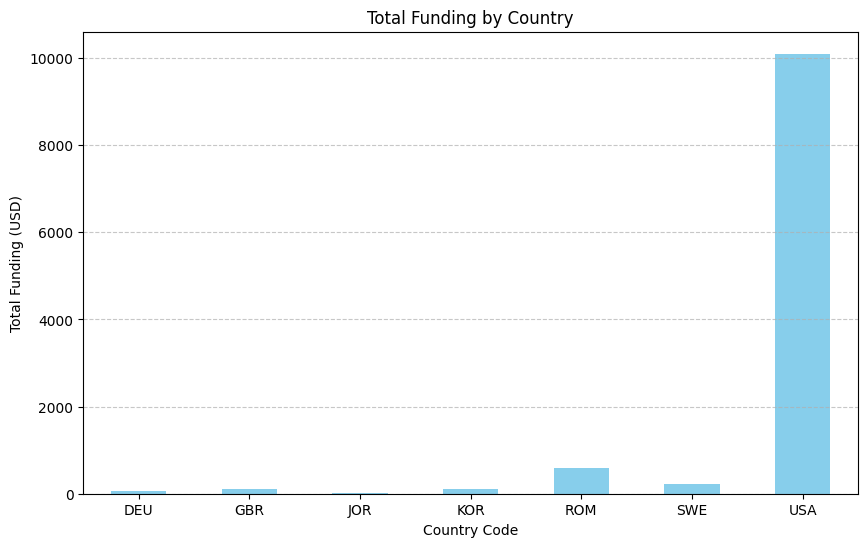

In [33]:
df1 = pd.read_csv("/content/investments_VC.csv", encoding='ISO-8859-1')
df1
# Strip whitespace from all column names
df1.columns = df1.columns.str.strip()

# Rename the column
df1.rename(columns={'funding_total_usd': 'amount_USD1'}, inplace=True)
df1.rename(columns={'founded_month': 'month'}, inplace=True)
df1.rename(columns={'founded_year': 'year'}, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df1 and has columns 'country_code' and 'amount_USD'

# Convert 'amount_USD' to numeric, coerce errors to NaN
df1['amount_USD1'] = pd.to_numeric(df1['amount_USD1'], errors='coerce')

# Drop rows with NaN in 'amount_USD' if any
df1 = df1.dropna(subset=['amount_USD1'])

# Group by 'country_code' and calculate the sum of 'amount_USD' for each country
country_funding = df1.groupby('country_code')['amount_USD1'].sum()

# Plotting the bar plot
country_funding.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding titles and labels
plt.title('Total Funding by Country')
plt.xlabel('Country Code')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



**Insights**

1.   USA received maximum funding while Germany received very less funding.

**Determining the total number of startups across different countries**

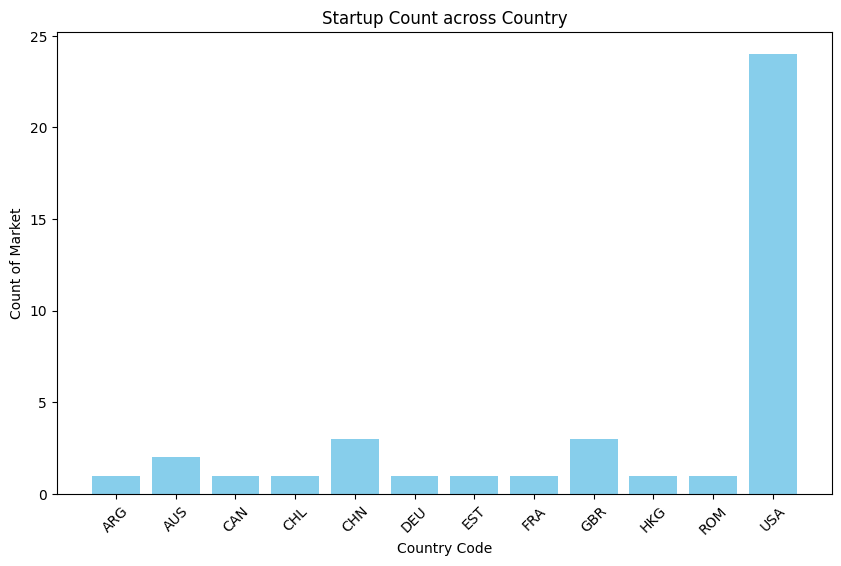

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = {
    'country_code': ['ARG', 'AUS', 'CAN', 'CHL', 'CHN', 'DEU', 'EST', 'FRA', 'GBR', 'HKG', 'ROM', 'USA'],
    'Count of market': [1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 24]
}

# Create a dataframe
import pandas as pd
df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(df['country_code'], df['Count of market'], color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Count of Market')
plt.title('Startup Count across Country')
plt.xticks(rotation=45)
plt.show()


**Insights**

1.   USA has the highest number of startups.
2.   Argentina ,Canada,France,Hong Kong have nominal number of startups .

**Determining the current status of startups across different countries.**

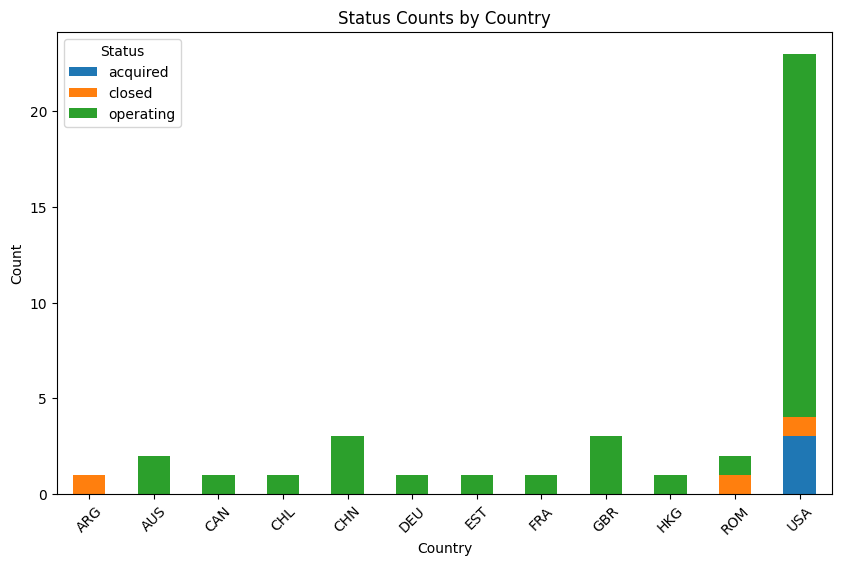

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Country': ['ARG', 'AUS', 'CAN', 'CHL', 'CHN', 'DEU', 'EST', 'FRA', 'GBR', 'HKG', 'ROM', 'USA'],
    'acquired': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    'closed': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    'operating': [0, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 19]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set 'Country' as index for easy plotting
df.set_index('Country', inplace=True)

# Plotting
df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Status Counts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

**Insights**

1.   Argentina contribution in number of startups are very low and almost all of them are in closed sate.
2.   USA has maximum number of startups and majority of them are in operating status.

**Outliers Detection**

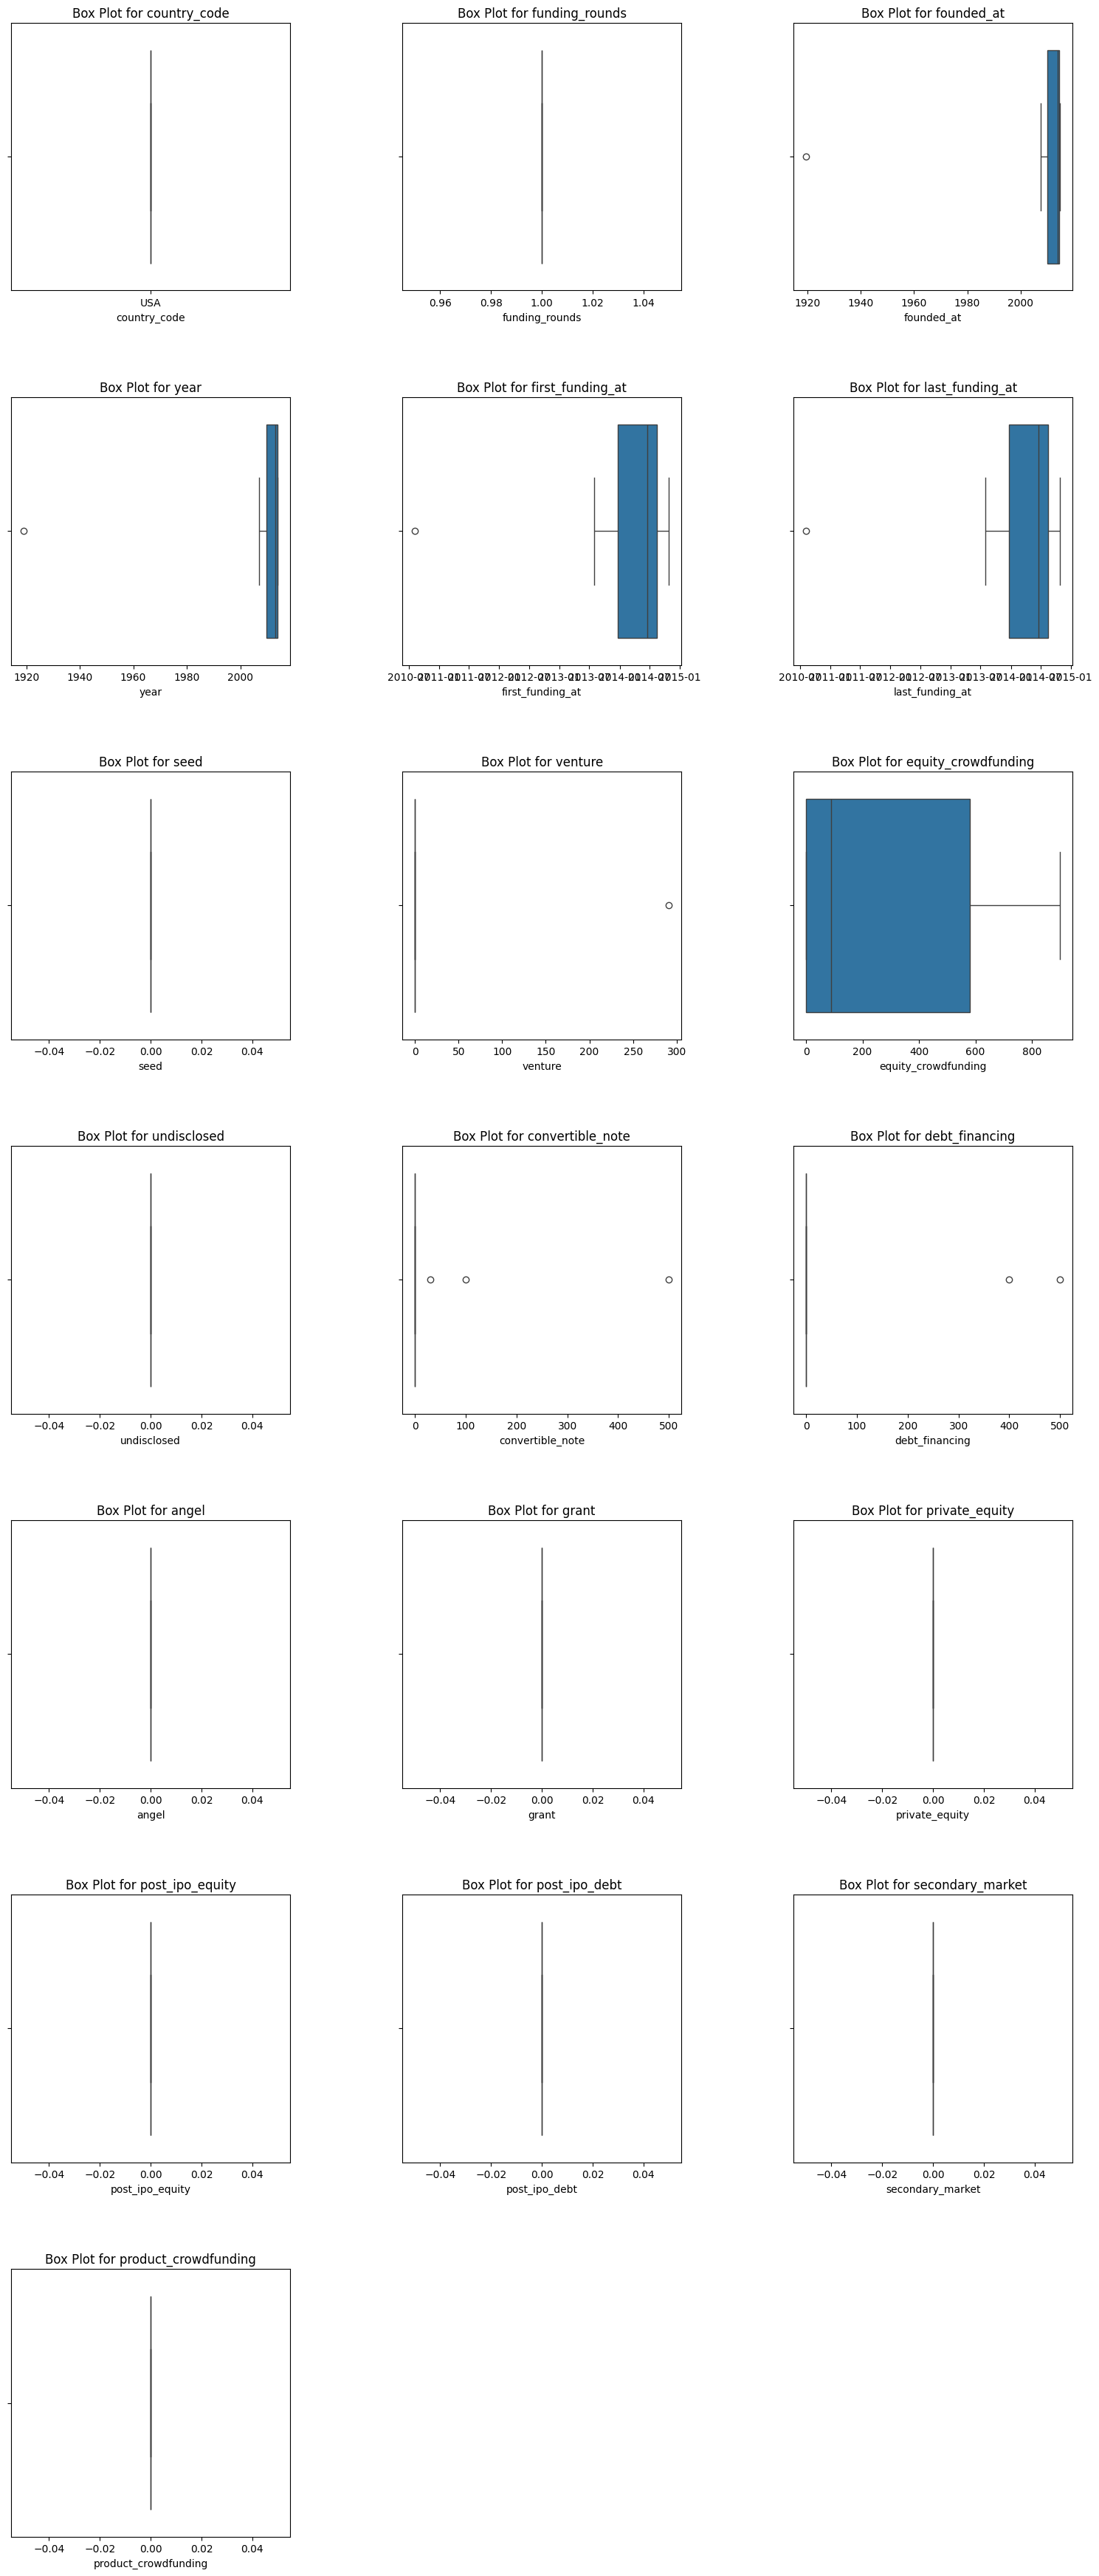

In [18]:
columns_to_check = ['country_code',
                    'funding_rounds', 'founded_at',  'year',
                    'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
                    'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity',
                    'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Creating a box plot for each column
num_columns = len(columns_to_check)
num_rows = (num_columns // 3) + (num_columns % 3)  # Adjusting the number of rows based on 3 columns per row

plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure height to accommodate three plots per row

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(num_rows, 3, i)  # Automatically adjust the number of rows and columns (3 per row)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between subplots
plt.show()



**Insights from Boxplots**

1.   **Distribution of Funding Data** (Applicable for Columns like 'funding_rounds', 'seed', 'venture', 'angel', and 'private_equity') : it indicate that companies with exceptionally large funding rounds compared to others.
2.   **Time-Related Funding Insights** ( Applicable for Columns like 'founded_at', 'first_funding_at', and 'last_funding_at' ) : it suggests that many startups are receiving funding in the same period, possibly indicating a trend or a boom in funding during that period.



**How Does the Funding Ecosystem Changes with Respect to Time?**

In [19]:
# Convert 'amount_USD' to numeric, forcing errors to NaN for invalid entries
df['amount_USD'] = pd.to_numeric(df['amount_USD'], errors='coerce')

# Now aggregate the data by year and month
monthly_funding = df.groupby(['year', 'month']).agg(
    total_funding=('amount_USD', 'sum'),
    number_of_investments=('amount_USD', 'count'),
    average_funding=('amount_USD', 'mean')
).reset_index()

# Display the result
monthly_funding.head()


,year,month,total_funding,number_of_investments,average_funding
0,1919,6,700.0,1,700.0
1,2007,9,900.0,2,450.0
2,2009,6,291.0,1,291.0
3,2010,4,800.0,1,800.0
4,2010,7,800.0,1,800.0


In [20]:
# Create a 'year_month' column for plotting
monthly_funding['year_month'] = pd.to_datetime(monthly_funding[['year', 'month']].assign(day=1))

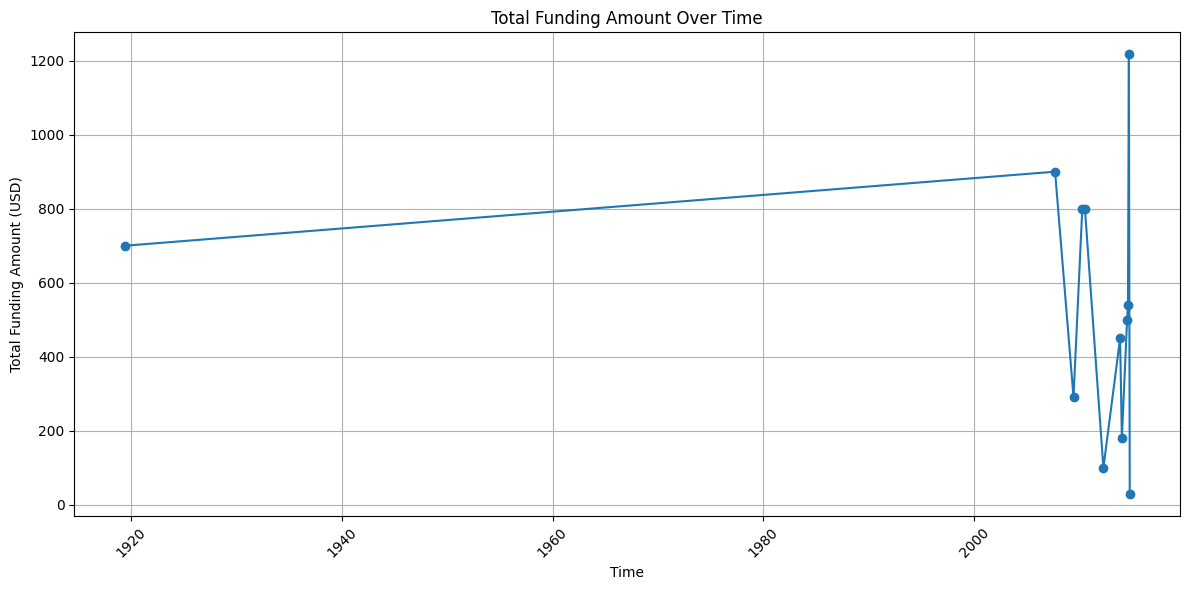

In [21]:
# Combine 'year' and 'month' into a single datetime column
monthly_funding['year_month'] = pd.to_datetime(monthly_funding[['year', 'month']].assign(day=1))

# Sort by the new 'year_month' column to ensure the timeline is sequential
monthly_funding = monthly_funding.sort_values(by='year_month')

# Plot total funding amount over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_funding['year_month'], monthly_funding['total_funding'], marker='o', linestyle='-')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Insights**

1.   **Fluctuations**: Noticeable fluctuations in total funding amounts between 1900 and 2010.
2.   **Peak**: Peak funding amount was observed in 217.
3.   **Low Activity**: Low funding activity in late 1900 and early 2000.

**Determining top 10 investment types**

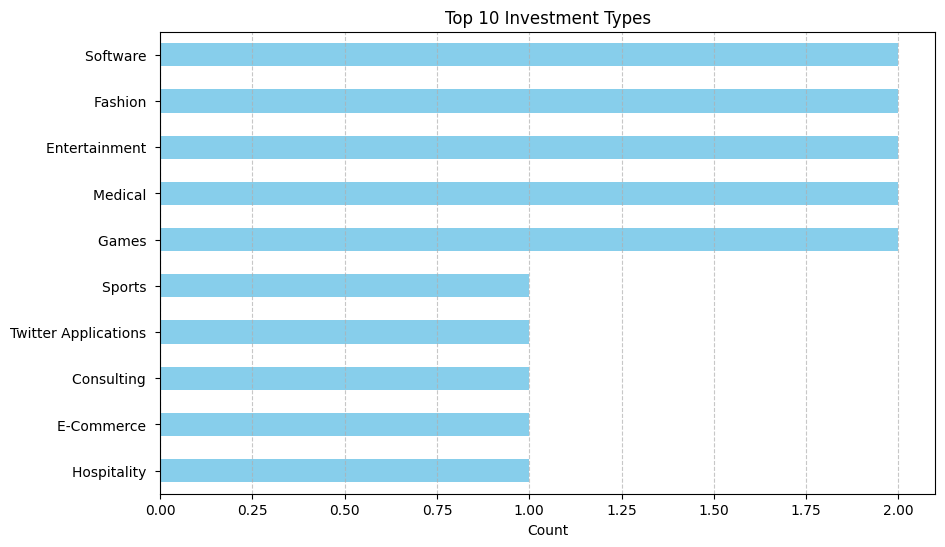

In [22]:
# Calculate the count of each investment type and select the top 10

top_investment_types = df['market'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
top_investment_types.plot(kind='barh', color='skyblue')
plt.title('Top 10 Investment Types')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insights**

1.   Software,Biotechnology and mobile hold first,second and third place respectively in terms of investment types.


**Determining top 10 total investment amount by investment type**

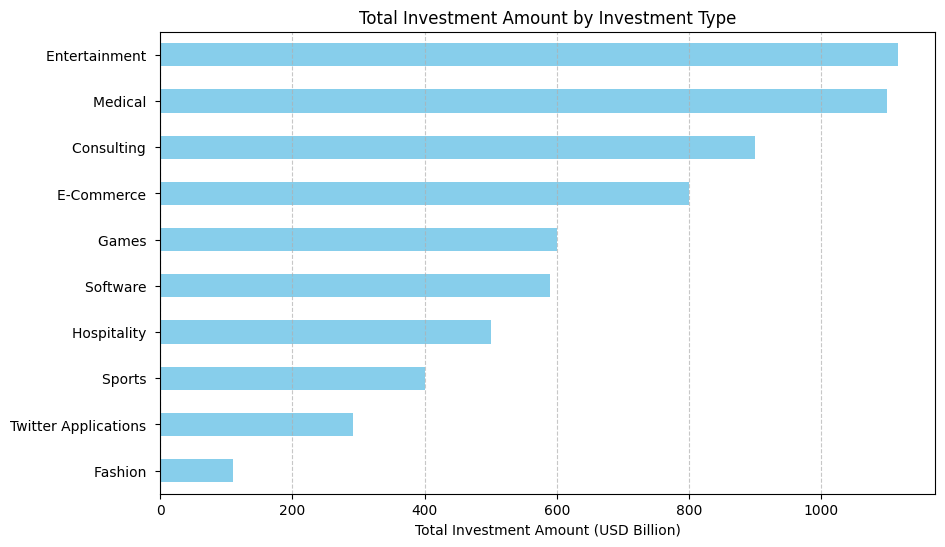

In [23]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('market')['amount_USD'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
top_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Total Investment Amount by Investment Type')
plt.xlabel('Total Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insights**

1.   Highest investment was made for Entertainment category.
2.   Lowest investment was made for Fashion category.

**Determining the total investment amount for each investment type and identify the top 10 highest investment types.**

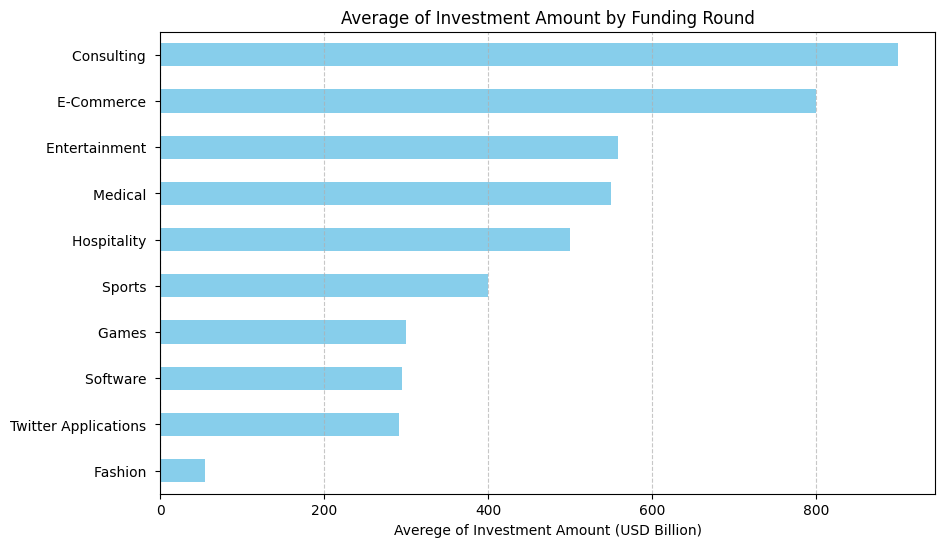

In [24]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('market')['amount_USD'].sum().nlargest(10).index

# Calculate the mean investment amount for these top investment types
mean_investment_amounts = df[df['market'].isin(top_investment_amounts)].groupby('market')['amount_USD'].mean().sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
mean_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Average of Investment Amount by Funding Round')
plt.xlabel('Averege of Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insights**

**High Investment in Consulting, E-commerce, and Entertainment Sectors**:Consulting, E-commerce, and Entertainment lead in investment amounts, reflecting strong investor confidence driven by technological advancements, digital transformation, and growing consumer demand.

**What types of industries are most favorable for startups?**

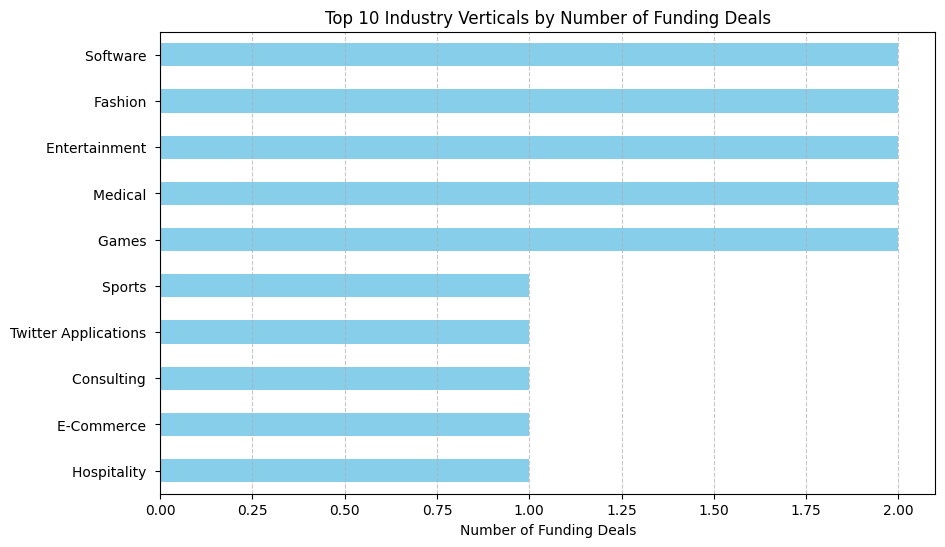

In [25]:
# Calculate the number of funding deals for each industry vertical and select the top 10
top_industry_verticals = df['market'].value_counts().nlargest(10).sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_industry_verticals.plot(kind='barh', color='skyblue')
plt.title('Top 10 Industry Verticals by Number of Funding Deals')
plt.xlabel('Number of Funding Deals')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Insights**


1.   **Software**: Leading with the highest number of funding rounds.
2.   **Technology**: Second most active funding rounds.
3.   **Clean Technology**: Least significant in terms of funding rounds.

Columns in top_industries: Index(['market', 'count'], dtype='object')


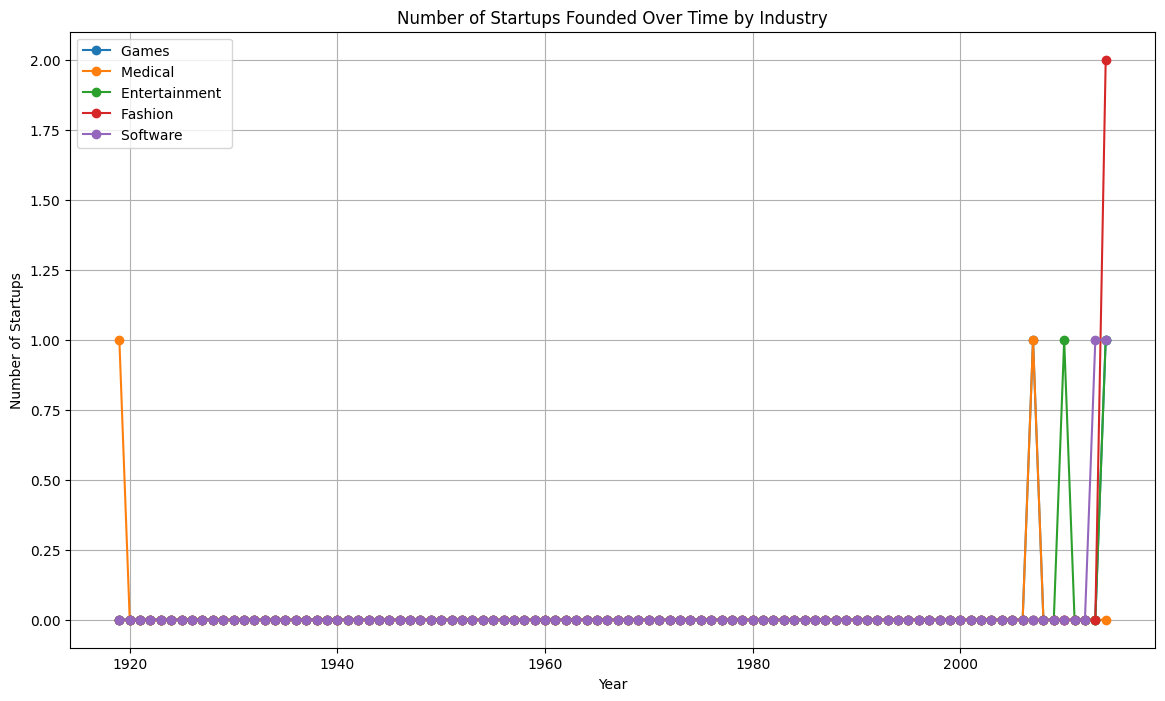

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out unknown markets and get the top 10 industries
top_industries = df[df['market'] != 'unknown']['market'].value_counts().head(10).reset_index()

# Print column names of top_industries to confirm
print("Columns in top_industries:", top_industries.columns)

# Use the appropriate column name based on the printed output
industry_column = top_industries.columns[0]  # This should hold the industry names
top_industries_list = top_industries[industry_column].head(5)

# Group by year and industry, and fill missing values
yearly_industry_count = df.groupby(['year', 'market']).size().unstack().fillna(0)

# Reindex to include all years, filling in any gaps
all_years = pd.Index(range(df['year'].min(), df['year'].max() + 1), name='year')
yearly_industry_count = yearly_industry_count.reindex(all_years, fill_value=0)

# Plotting the line plots for the top industries over time
plt.figure(figsize=(14, 8))
for industry in top_industries_list:
    if industry in yearly_industry_count.columns:  # Check to avoid KeyError
        plt.plot(yearly_industry_count.index, yearly_industry_count[industry], marker='o', label=industry)
plt.title('Number of Startups Founded Over Time by Industry')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()


**How does location influence the growth trajectory of a startup?**

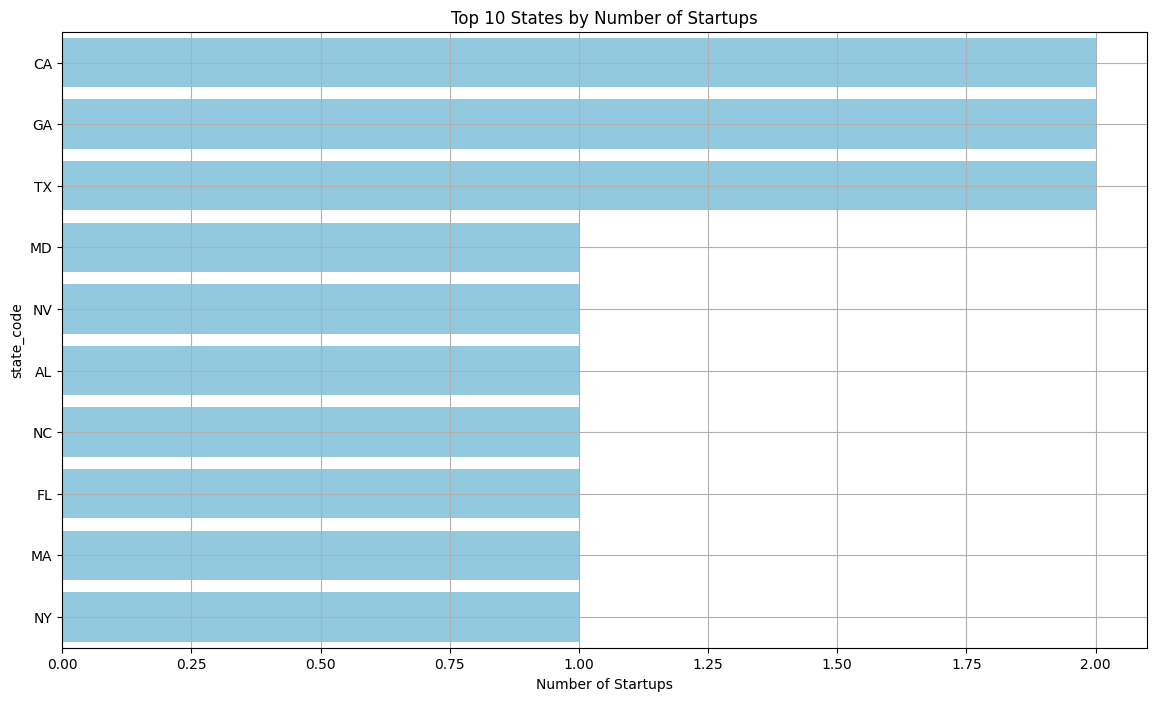

In [27]:
# Count the number of startups in each city
top_cities_count = df['state_code'].value_counts().head(10).reset_index()
top_cities_count.columns = ['state_code', 'Count']

# Plot the number of startups by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='state_code', data=top_cities_count, color='skyblue')
plt.title('Top 10 States by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('state_code')
plt.grid(True)
plt.show()

**Insight**

1.   Maximum number of startups were in state CA,USA.
2.   Minimum number of startups were in state ON,USA.

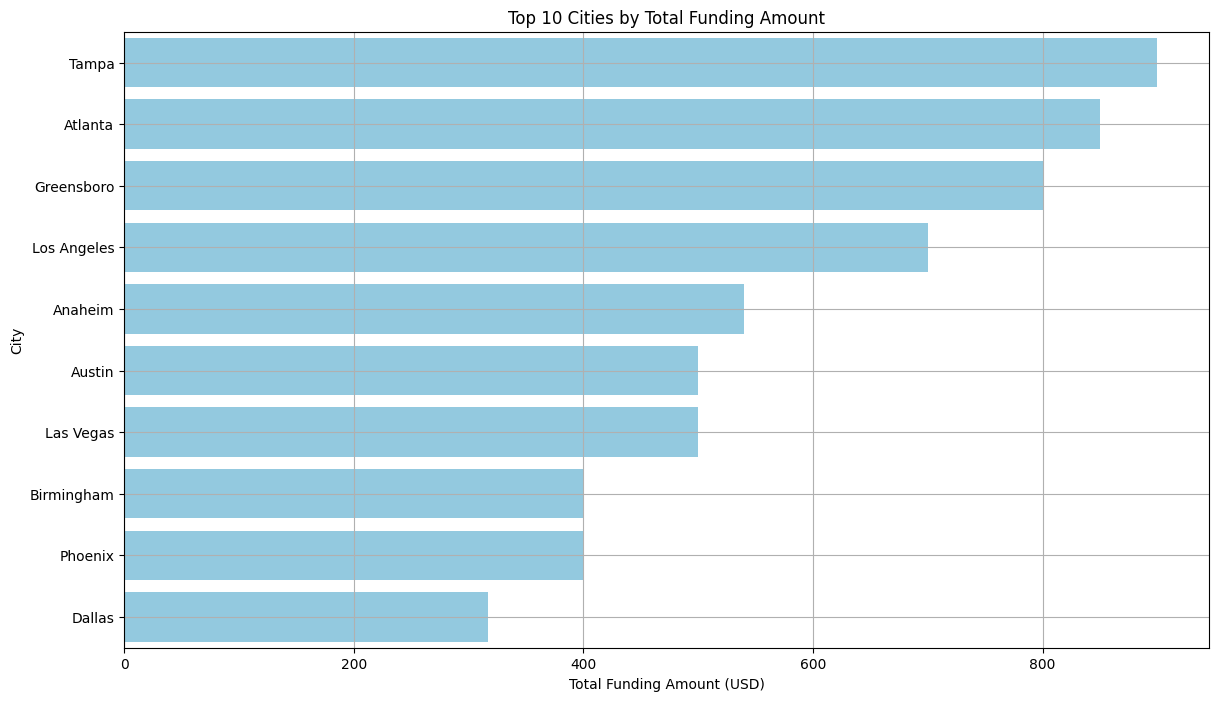

In [28]:
# Calculate the total funding amount received by startups in each city
top_cities_funding = df.groupby('region')['amount_USD'].sum().reset_index()
top_cities_funding = top_cities_funding.sort_values(by='amount_USD', ascending=False).head(10)
top_cities_funding.columns = ['City', 'Total Funding Amount']

# Plot the total funding amount by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Funding Amount', y='City', data=top_cities_funding, color='skyblue')
plt.title('Top 10 Cities by Total Funding Amount')
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('City')
plt.grid(True)
plt.show()

**Determining total funding across different countries.**

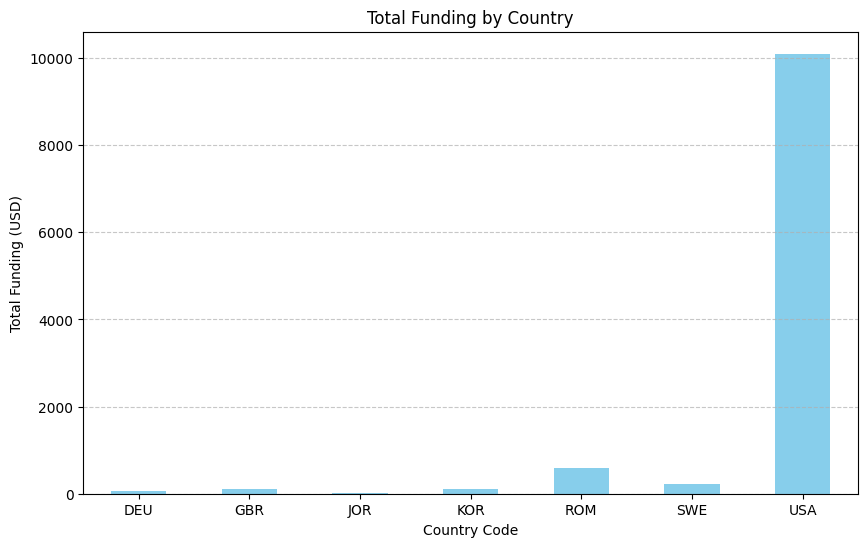

In [29]:
df1 = pd.read_csv("/content/investments_VC.csv", encoding='ISO-8859-1')
df1
# Strip whitespace from all column names
df1.columns = df1.columns.str.strip()

# Rename the column
df1.rename(columns={'funding_total_usd': 'amount_USD1'}, inplace=True)
df1.rename(columns={'founded_month': 'month'}, inplace=True)
df1.rename(columns={'founded_year': 'year'}, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df1 and has columns 'country_code' and 'amount_USD'

# Convert 'amount_USD' to numeric, coerce errors to NaN
df1['amount_USD1'] = pd.to_numeric(df1['amount_USD1'], errors='coerce')

# Drop rows with NaN in 'amount_USD' if any
df1 = df1.dropna(subset=['amount_USD1'])

# Group by 'country_code' and calculate the sum of 'amount_USD' for each country
country_funding = df1.groupby('country_code')['amount_USD1'].sum()

# Plotting the bar plot
country_funding.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adding titles and labels
plt.title('Total Funding by Country')
plt.xlabel('Country Code')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



**Determining the total number of startups across different countries**

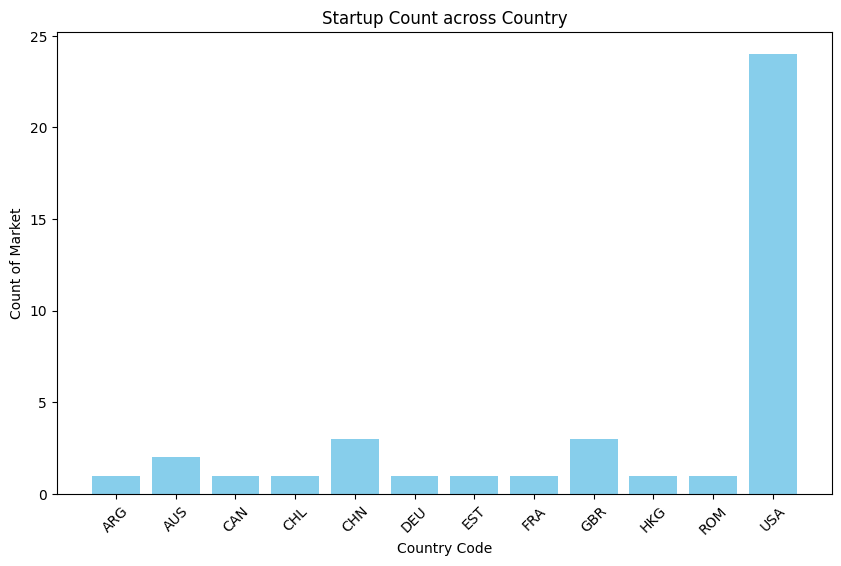

In [30]:
import matplotlib.pyplot as plt

# Sample data
data = {
    'country_code': ['ARG', 'AUS', 'CAN', 'CHL', 'CHN', 'DEU', 'EST', 'FRA', 'GBR', 'HKG', 'ROM', 'USA'],
    'Count of market': [1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 24]
}

# Create a dataframe
import pandas as pd
df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(df['country_code'], df['Count of market'], color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Count of Market')
plt.title('Startup Count across Country')
plt.xticks(rotation=45)
plt.show()


**Insights**

1.   Most of the startups are in healthy and are in opearting phase.
2.   A very small portion of startups have been completed closed.

**Determining the current status of startups across different countries.**

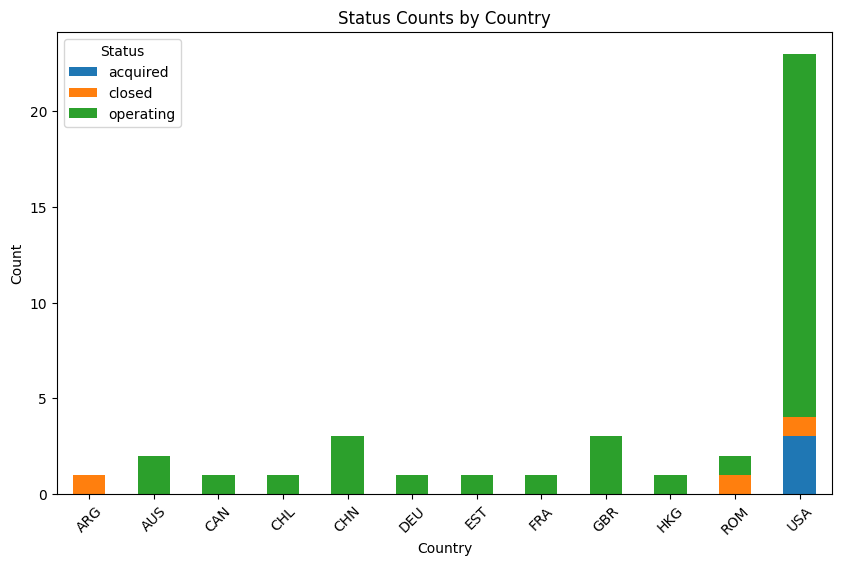

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Country': ['ARG', 'AUS', 'CAN', 'CHL', 'CHN', 'DEU', 'EST', 'FRA', 'GBR', 'HKG', 'ROM', 'USA'],
    'acquired': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    'closed': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    'operating': [0, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 19]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set 'Country' as index for easy plotting
df.set_index('Country', inplace=True)

# Plotting
df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Status Counts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

**Insights**

1.   Argentina contribution in number of startups are very low and almost all of them are in closed sate.
2.   USA has maximum number of startups and majority of them are in operating status.

**Observations:**
1.	**Funding Trends Over Time**: A clear trend in the funding levels for startups is observed, with certain years showing marked spikes, reflecting periods of strong investor interest and economic growth.
2.	**General Funding Levels**: The analysis highlights a broad spectrum of funding amounts, with a notable share of startups receiving substantial investments. Most startups, however, secured funding within specific ranges, indicating typical investment sizes.
3.	**Industry Preferences**: Sectors such as Software, Biotechnology, Mobile, and Curated Web were among the top recipients of funding, suggesting strong investor preference for these industries due to their high growth potential and market demand.
4.	**Geographical Influence**: Cities like Tampa, Atlanta, and Greensboro emerged as top locations for startup funding, likely due to their supportive ecosystems, strong infrastructure, and proximity to investors.
5.	**Key Players in the Ecosystem**: The analysis identified prominent investors actively contributing to the startup ecosystem. These investors have not only provided capital but also mentorship and networking opportunities, playing a pivotal role in nurturing startup growth.
6.	**Types of Funding**: Various funding types, including Seed Funding and Equity Crowdfunding, were identified. Each funding type supports different growth stages, from initial product development to scaling and market expansion.


**Recommendations**:

1.	**For Startups**:  

      **Target High-Growth Sector**s: Focus on sectors with strong investor interest like Software and Biotechnology.  
      **Leverage Geographic Hubs**: Operate in startup-friendly cities to access better funding and resources.  
      **Diversify Funding Sources**: Seek multiple funding types to secure capital at various growth stages.  
      **Enhance Investor Readiness**: Develop solid business plans and market strategies to attract investors.  
      **Focus on Sustainable Growth**: Balance growth with profitability for long-term resilience.  
      **Cultivate Strong Networks**: Attend industry events and competitions to connect with investors and mentors.  

2.	**For Investors**:

      **Monitor Emerging Sectors**: Keep abreast of high-growth sectors like AI and Clean Energy.  
      **Strengthen Ecosystem Infrastructure**: Support local incubators and accelerators to develop startup ecosystems.  
      **Support Diverse Funding Rounds**: Participate across different funding stages to diversify risk.  
      **Prioritize Sustainable Investments**: Focus on startups with sustainable, ethical practices aligned with ESG goals.  
      **Foster Long-Term Partnerships**: Offer mentorship and networking to build enduring relationships with startups.  
      **Promote Innovation in New Areas**: Invest in underrepresented sectors and regions to diversify and drive innovation.  
